In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Desafío 1: Preparar el ambiente de trabajo
● Cargue las librerías básicas para importación y manipulación de datos (numpy, pandas), gráficos (matplotlib y seaborn) y de modelación econométrica (statsmodels).
● Importe el archivo southafricanheart.csv que se encuentra dentro del material de apoyo.
● Realice una descripción del set importado mostrando:
    ○ lista con los nombres de variables importadas
    ○ un análisis descriptivo mediante describe()
    ○ Distribución de categorías para las variables famhist y chd.


In [2]:
df = pd.read_csv('southafricanheart.csv')
df.drop(columns = ['Unnamed: 0'], inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [4]:
df.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [5]:
df['famhist'].value_counts()

Absent     270
Present    192
Name: famhist, dtype: int64

In [6]:
df['chd'].value_counts()

0    302
1    160
Name: chd, dtype: int64

# Desafío 2
    A continuación se presenta el siguiente modelo a estimar:
    Para ello ejecute los siguientes pasos:
    1. Recodifique   adummy,asignando1alacategoríaminoritaria.
    2. Utilice   paraestimarelmodelo.
    3. Implemente una función inverse_logit que realice el mapeo de log-odds a probabilidad.
    4. Conelmodeloestimado,respondalosiguiente:
        ○ ¿Cuál es la probabilidad de un individuo con antecedentes familiares de tener una enfermedad coronaria?
        ○ ¿Cuál es la probabilidad de un individuo sin antecedentes familiares de tener una enfermedad coronaria?
        ○ ¿Cuál es la diferencia en la probabilidad entre un individuo con antecedentes y otro sin antecedentes?
    ○ Replique el modelo con smf.ols y comente las similitudes entre los coeficientes estimados.
    Tip: Utilice β/4

In [7]:
df['famhist'] = df['famhist'].replace(['Absent', 'Present'], [0, 1])

In [8]:
df['famhist'].value_counts()

0    270
1    192
Name: famhist, dtype: int64

In [9]:
model_1 = smf.logit('chd ~ famhist', df).fit()

Optimization terminated successfully.
         Current function value: 0.608111
         Iterations 5


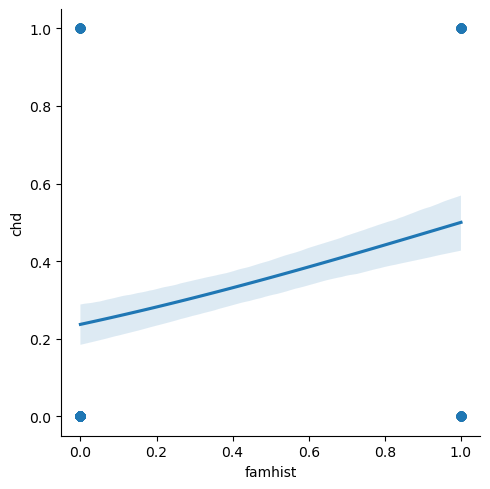

In [11]:
sns.lmplot('famhist', 'chd', df, logistic=True)

In [12]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      460
Method:                           MLE   Df Model:                            1
Date:                Wed, 21 Sep 2022   Pseudo R-squ.:                 0.05740
Time:                        12:46:05   Log-Likelihood:                -280.95
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 4.937e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1690      0.143     -8.169      0.000      -1.449      -0.889
famhist        1.1690      0.203      5.751      0.000       0.771       1.567
==============================================================================
"""

In [13]:
def inverse_logit(x):
    return 1 / (1 + np.exp(-x))

In [14]:
prob_famhist = inverse_logit(model_1.params['Intercept'] +model_1.params['famhist'] * 1)
prob_intercept = inverse_logit(model_1.params['Intercept'])
print("La probabilidad de tener una enfermedad es de",prob_famhist, "cuando existe antecedentes familiares")
print("La probabilidad de tener una enfermedad es de",round(prob_intercept,2), "cuando no existen antecedentes familiares")
print("Un individuo con antecedentes familiares tiene ", round(prob_famhist - prob_intercept,2), "mas de tener enfermedades cardiácas")

La probabilidad de tener una enfermedad es de 0.4999999999999999 cuando existe antecedentes familiares
La probabilidad de tener una enfermedad es de 0.24 cuando no existen antecedentes familiares
Un individuo con antecedentes familiares tiene  0.26 mas de tener enfermedades cardiácas


In [15]:
model_1_lpm = smf.ols('chd ~ famhist',df).fit() 
model_1_lpm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.072   
Dependent Variable: chd              AIC:                593.1725
Date:               2022-09-21 12:47 BIC:                601.4437
No. Observations:   462              Log-Likelihood:     -294.59 
Df Model:           1                F-statistic:        36.86   
Df Residuals:       460              Prob (F-statistic): 2.66e-09
R-squared:          0.074            Scale:              0.21050 
-------------------------------------------------------------------
              Coef.    Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     0.2370     0.0279   8.4893   0.0000   0.1822   0.2919
famhist       0.2630     0.0433   6.0713   0.0000   0.1778   0.3481
-----------------------------------------------------------------
Omnibus:             768.898       Durbin-Watson:          1.961 
Prob(Omnibus):       0.000         Jarque-Bera (JB):       58.778
Skew:                0.579         Prob(JB):               0.000 
Kurtosis:            1.692         Condition No.:          2     
=================================================================

"""

# Desafío 3: Estimación completa
Implemente un modelo con la siguiente forma:
    ● Depure el modelo manteniendo las variables con significancia estadística al 5%.
    ● Compare los estadísticos de bondad de ajuste entre ambos.
    ● Reporte de forma sucinta el efecto de las variables en el log-odds de tener una enfermedad coronaria.


In [16]:
model_2 = smf.logit('chd ~ sbp + tobacco + ldl + adiposity + famhist + typea + obesity + alcohol + age', df).fit()
model_2.summary2()

Optimization terminated successfully.
         Current function value: 0.510974
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.208     
Dependent Variable: chd              AIC:              492.1400  
Date:               2022-09-21 13:27 BIC:              533.4957  
No. Observations:   462              Log-Likelihood:   -236.07   
Df Model:           9                LL-Null:          -298.05   
Df Residuals:       452              LLR p-value:      2.0548e-22
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -6.1507    1.3083  -4.7015  0.0000  -8.7149  -3.5866
sbp            0.0065    0.0057   1.1350  0.2564  -0.0047   0.0177
tobacco        0.0794    0.0266   2.9838  0.0028   0.0272   0.1315
ldl            0.1739    0.0597   2.9152  0.0036   0.0570   0.2909
adiposity      0.0186    0.0293   0.6346  0.5257  -0.0388   0.0760
famhist        0.9254    0.2279   4.0605  0.0000   0.4787   1.3720
typea          0.0396    0.0123   3.2138  0.0013   0.0154   0.0637
obesity       -0.0629    0.0442  -1.4218  0.1551  -0.1496   0.0238
alcohol        0.0001    0.0045   0.0271  0.9784  -0.0087   0.0089
age            0.0452    0.0121   3.7285  0.0002   0.0215   0.0690
=================================================================

"""

In [17]:
model__depurado = smf.logit('chd ~ tobacco + ldl + famhist + typea + age', df).fit()
model__depurado.summary2()

Optimization terminated successfully.
         Current function value: 0.514811
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.202     
Dependent Variable: chd              AIC:              487.6856  
Date:               2022-09-21 13:28 BIC:              512.4990  
No. Observations:   462              Log-Likelihood:   -237.84   
Df Model:           5                LL-Null:          -298.05   
Df Residuals:       456              LLR p-value:      2.5537e-24
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -6.4464    0.9209  -7.0004  0.0000  -8.2513  -4.6416
tobacco        0.0804    0.0259   3.1057  0.0019   0.0297   0.1311
ldl            0.1620    0.0550   2.9470  0.0032   0.0543   0.2697
famhist        0.9082    0.2258   4.0228  0.0001   0.4657   1.3507
typea          0.0371    0.0122   3.0505  0.0023   0.0133   0.0610
age            0.0505    0.0102   4.9442  0.0000   0.0305   0.0705
=================================================================

"""

In [18]:
model__depurado.params[ 'ldl' ]

0.1619916356965168

# Desafío 4: Estimación de perfiles
A partir del modelo depurado, genere las estimaciones en log-odds y posteriormente transfórmelas a probabilidades con inverse_logit. Los perfiles a estimar son los siguientes:
    ● La probabilidad de tener una enfermedad coronaria para un individuo con características similares a la muestra.
    ● La probabilidad de tener una enfermedad coronaria para un individuo con altos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes.
    ● La probabilidad de tener una enfermedad coronaria para un individuo con bajos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes.

In [19]:
def parammean(variable, dataframe=df, model=model__depurado):
    return  model.params[variable] * dataframe[variable].mean()

In [20]:
pr_profile_mean = model__depurado.params[ 'Intercept' ] + parammean( 'tobacco' ) +parammean( 'ldl' ) + parammean( 'typea' ) + parammean( 'age' )+parammean( 'famhist' ) 

In [21]:
print("La probabilidad de tener una enfermedad coronaria es de",inverse_logit(pr_profile_mean), "para un individuo con características similares a la muestra")

La probabilidad de tener una enfermedad coronaria es de 0.29370927481586956 para un individuo con características similares a la muestra


In [22]:
pr_profile_ldl_max = model__depurado.params[ 'Intercept' ] + parammean( 'tobacco') +model__depurado.params[ 'ldl' ] * df[ 'ldl' ].max() + parammean( 'typea' ) + parammean( 'age' ) + parammean( 'famhist' )

In [23]:
print("La probabilidad de tener una enfermedad coronaria es de",inverse_logit(pr_profile_ldl_max), "para un individuo con altos niveles de lipoproteína de baja densidad")

La probabilidad de tener una enfermedad coronaria es de 0.6980443104466211 para un individuo con altos niveles de lipoproteína de baja densidad


In [24]:
pr_profile_ldl_min =model__depurado.params[ 'Intercept' ] + parammean( 'tobacco') +model__depurado.params[ 'ldl' ] * df[ 'ldl' ].min() + parammean( 'typea' ) + parammean( 'age' ) + parammean( 'famhist' )

In [25]:
print("La probabilidad de tener una enfermedad coronaria es de",inverse_logit(pr_profile_ldl_min), "para un individuo con bajos niveles de lipoproteína de baja densidad")

La probabilidad de tener una enfermedad coronaria es de 0.18443595575404645 para un individuo con bajos niveles de lipoproteína de baja densidad
